# Modelo de regresión lineal para la predicción de la duración de los quirófanos.
 ## Análisis del rendimiento del modelo de regresión lineal.
 
 ### Trabajo de Fin de Grado - Universidad de Burgos
 #### Jesús García Armario

In [1]:
# Imports necesarios
import numpy as np
from linearReg import LinearReg
import pandas as pd

In [2]:
# Leemos el listado preprocesado de datos
data = pd.read_excel('../../Datos/Listados_Preprocesados/ListadoInterv_Preprocesado_Codificado.xlsx')

In [3]:
# Separamos los datos en X e Y
# Y será la columna de duración de la intervención
# X será el resto de columnas
X = data.drop(['DURACIÓN'], axis=1)
Y = data['DURACIÓN']
# Eliminamos las dos primeras columnas de X, que son los ID del paciente
X = X.drop(['Unnamed: 0', 'NHC'], axis=1)

In [4]:
# Usamos un método de GridSearch para encontrar los mejores parámetros para el modelo
# de regresión lineal
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
# Definimos los parámetros que queremos probar
parameters = {'fit_intercept': [True, False], 'copy_X': [True, False],'n_jobs': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
# Creamos el objeto GridSearchCV
reg = GridSearchCV(LinearRegression(), parameters, cv=5)
# Entrenamos el modelo
reg.fit(X, Y)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [5]:
# Entrenamos el modelo con los parámetros encontrados
model = LinearReg(data=X, target=Y, n_jobs=reg.best_params_['n_jobs'], fit_intercept=reg.best_params_['fit_intercept'], copy_X=reg.best_params_['copy_X'], test_size=0.2, random_state=42)

In [6]:
# Mostramos los resultados
print('MSE: ', model.getMSE())
print('R2: ', model.getR2())
print('Cross Validation MSE: ', model.getCrossValMSE())
print('Cross Validation R2: ', model.getCrossValR2())
print('Cross Validation RMSE: ', model.getCrossValRMSE())

MSE:  184856347.18167934
R2:  -0.0004123032170841867
Cross Validation MSE:  55694590.09043642
Cross Validation R2:  -0.0004500885336720106
Cross Validation RMSE:  7462.880817113216


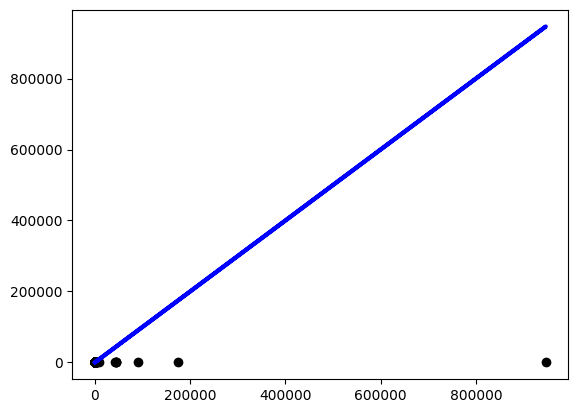

In [7]:
# Representamos gráficamente los resultados de la predicción
import matplotlib.pyplot as plt
plt.scatter(model.y_test, model.y_pred, color='black')
plt.plot(model.y_test, model.y_test, color='blue', linewidth=3)
plt.show()

In [8]:
# Exportamos el modelo a un fichero
model.exportModel('linearRegModel.pkl')

In [9]:
# Cargamos los datos del dataset ampliado
data = pd.read_excel('../../Datos/Listados_Preprocesados/ListadoInterv_Preprocesado_PLASTICA_Codificado.xlsx')
# Eliminamos las filas que NO son números en Código diagnóstico
data = data[data['Código diagnóstico'].apply(lambda x: isinstance(x, (int, float)))]
# Convertimos a float
data['Código diagnóstico'] = data['Código diagnóstico'].astype(float)
# Eliminamos nulos
data = data.dropna()

In [10]:
X = data.drop(['DURACIÓN'], axis=1)
Y = data['DURACIÓN']
# Eliminamos la primera columna de X, que es el ID del paciente
X = X.drop(['NHC'], axis=1)

In [11]:
parameters = {'fit_intercept': [True, False], 'copy_X': [True, False],'n_jobs': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
# Creamos el objeto GridSearchCV
reg = GridSearchCV(LinearRegression(), parameters, cv=5)
# Entrenamos el modelo
reg.fit(X, Y)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [12]:
# Entrenamos el modelo con los parámetros encontrados
model_plastica = LinearReg(data=X, target=Y, n_jobs=reg.best_params_['n_jobs'], fit_intercept=reg.best_params_['fit_intercept'], copy_X=reg.best_params_['copy_X'], test_size=0.2, random_state=42)

In [13]:
# Mostramos los resultados
print('MSE: ', model_plastica.getMSE())
print('R2: ', model_plastica.getR2())
print('Cross Validation MSE: ', model_plastica.getCrossValMSE())
print('Cross Validation R2: ', model_plastica.getCrossValR2())
print('Cross Validation RMSE: ', model_plastica.getCrossValRMSE())

MSE:  6713107.073417947
R2:  -0.015497947646465171
Cross Validation MSE:  10660977.998869427
Cross Validation R2:  -0.018610398038643172
Cross Validation RMSE:  3265.115311726284


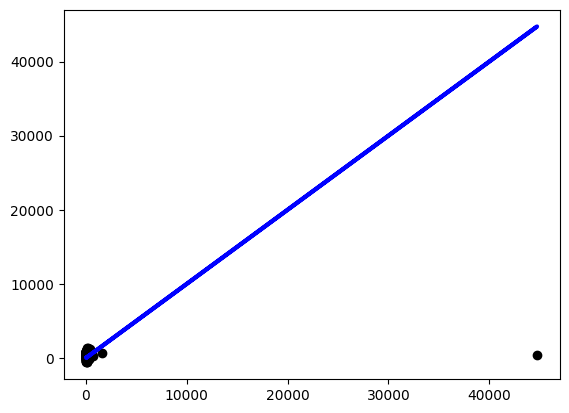

In [14]:
# Representamos gráficamente los resultados de la predicción
import matplotlib.pyplot as plt
plt.scatter(model_plastica.y_test, model_plastica.y_pred, color='black')
plt.plot(model_plastica.y_test, model_plastica.y_test, color='blue', linewidth=3)
plt.show()

In [15]:
# Lo exportamos a un fichero
model.exportModel('linearRegModel_PLASTICA.pkl')